In [3]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
from dateutil import parser
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import os
import IPython
import IPython.display
import tensorflow as tf
from keras.models import Model
import keras.layers as kl
import keras.activations as ka
import gc
import warnings
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import missingno as msno
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, MaxPooling1D, Input
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Reshape, Input, Dropout
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_train=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_minmax_df1.csv")
df_train

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-06-19 00:01:02,0.508197,1.000000,0.160656,0.922358,0.129904,8.137705e-13,0.0
1,2021-06-19 00:01:22,0.491803,1.000000,0.384741,0.913047,0.128160,8.137705e-13,0.0
2,2021-06-19 00:01:44,0.508197,1.000000,0.122764,0.919259,0.129032,8.137705e-13,0.0
3,2021-06-19 00:02:07,0.508197,1.000000,0.935694,0.900623,0.128160,8.137705e-13,0.0
4,2021-06-19 00:02:27,0.508197,1.000000,0.093913,0.909941,0.129032,8.137705e-13,0.0
...,...,...,...,...,...,...,...,...
69796,2021-08-10 04:02:46,0.196721,0.929293,0.174472,0.034165,0.727114,1.098970e-12,0.0
69797,2021-08-10 04:03:05,0.196721,0.939394,0.049393,0.034165,0.733217,1.140609e-12,0.0
69798,2021-08-10 04:03:25,0.196721,0.939394,0.179029,0.027954,0.733217,1.124848e-12,0.0
69799,2021-08-10 04:04:04,0.213115,0.939394,0.190994,0.034165,0.743679,7.781265e-13,0.0


In [3]:
df_test=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_test_minmax_df1.csv")
df_test

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-08-10 04:04:44,0.213115,0.939394,0.187534,0.027954,0.743679,8.349883e-13,0.0
1,2021-08-10 04:05:03,0.196721,0.939394,0.106389,0.027954,0.741935,9.811007e-13,0.0
2,2021-08-10 04:05:23,0.213115,0.929293,0.173815,0.027954,0.746295,1.053560e-12,0.0
3,2021-08-10 04:05:42,0.196721,0.939394,0.153370,0.040377,0.743679,8.061827e-13,0.0
4,2021-08-10 04:06:22,0.196721,0.939394,0.168819,0.037271,0.742807,8.308197e-13,0.0
...,...,...,...,...,...,...,...,...
29911,2021-10-13 02:48:31,0.934426,1.000000,0.010551,-3.096264,0.785527,1.358754e-11,0.0
29912,2021-10-13 03:17:36,0.934426,1.000000,0.024660,-3.018629,0.819529,9.609368e-12,0.0
29913,2021-10-13 03:46:49,0.918033,1.000000,0.020566,-3.173906,0.800349,1.891754e-11,0.0
29914,2021-10-13 04:13:23,0.885246,1.000000,0.117988,-3.195648,0.783784,2.462101e-11,0.0


In [4]:
df_combined = pd.concat([df_train, df_test], axis=0)

In [5]:
df_combined = df_combined.sort_values(by='Date')

In [6]:
df_combined

,Date,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
0,2021-06-19 00:01:02,0.508197,1.0,0.160656,0.922358,0.129904,8.137705e-13,0.0
1,2021-06-19 00:01:22,0.491803,1.0,0.384741,0.913047,0.128160,8.137705e-13,0.0
2,2021-06-19 00:01:44,0.508197,1.0,0.122764,0.919259,0.129032,8.137705e-13,0.0
3,2021-06-19 00:02:07,0.508197,1.0,0.935694,0.900623,0.128160,8.137705e-13,0.0
4,2021-06-19 00:02:27,0.508197,1.0,0.093913,0.909941,0.129032,8.137705e-13,0.0
...,...,...,...,...,...,...,...,...
29911,2021-10-13 02:48:31,0.934426,1.0,0.010551,-3.096264,0.785527,1.358754e-11,0.0
29912,2021-10-13 03:17:36,0.934426,1.0,0.024660,-3.018629,0.819529,9.609368e-12,0.0
29913,2021-10-13 03:46:49,0.918033,1.0,0.020566,-3.173906,0.800349,1.891754e-11,0.0
29914,2021-10-13 04:13:23,0.885246,1.0,0.117988,-3.195648,0.783784,2.462101e-11,0.0


In [7]:
df_combined.describe()

,Temperature,Turbidity,Dissolved_Oxygen,pH,Nitrate,Ammonia,general_missing
count,99717.000000,99717.000000,99717.000000,99717.000000,99717.000000,9.971700e+04,99717.000000
mean,0.419768,0.870864,0.310991,0.308878,0.342017,4.973681e-04,0.166932
std,0.206915,0.238545,0.279225,0.335896,0.272374,1.681466e-02,0.372917
min,-39.344262,0.000000,-0.000024,-5.251541,0.000000,-2.439578e-13,0.000000
25%,0.327869,0.857437,0.098860,0.102490,0.097646,8.137705e-13,0.000000
50%,0.442623,0.949495,0.226351,0.295031,0.249736,3.058712e-12,0.000000
75%,0.491803,1.000000,0.356856,0.487580,0.627724,1.159360e-08,0.000000
max,1.245902,1.000000,1.000000,1.000000,1.648649,1.000000e+00,1.000000


### Perform the Split
For instance, I want to use:

	•	70% of the data for training
	•	15% for validation (if needed)
	•	15% for testing

In [8]:
df_combined.set_index("Date",inplace=True)

In [9]:
# Determine the sizes for each split
train_size = int(len(df_combined) * 0.7)
validation_size = int(len(df_combined) * 0.15)
test_size = len(df_combined) - train_size - validation_size

# Split the data
df_train = df_combined.iloc[:train_size]  # First 70% for training
df_validation = df_combined.iloc[train_size:train_size + validation_size]  # Next 15% for validation
df_test = df_combined.iloc[train_size + validation_size:]  # Last 15% for testing

# Verify the splits
print(f"Training data shape: {df_train.shape}")
print(f"Validation data shape: {df_validation.shape}")
print(f"Test data shape: {df_test.shape}")

Training data shape: (69801, 7)
Validation data shape: (14957, 7)
Test data shape: (14959, 7)


In [10]:
df_train.columns

Index(['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia', 'general_missing'],
      dtype='object')

In [11]:
# Separate features and target variable
features = [ 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate']


Date Feature Extraction:
	•	Year, Month, Day, Hour, Minute: These features are extracted from the Date column and added as numerical features. This allows the model to learn patterns related to time.

In [12]:
X_train = df_train[features]
y_train = df_train['Temperature']

X_validation = df_validation[features]
y_validation = df_validation['Temperature']

X_test = df_test[features]
y_test = df_test['Temperature']

Before reshaping, you need to convert your DataFrame to a NumPy array.

In [13]:
# Convert the DataFrames to NumPy arrays with float type
X_train = np.array(X_train).astype(np.float32)
X_validation = np.array(X_validation).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)

# Reshape for LSTM/GRU input: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_validation = X_validation.reshape((X_validation.shape[0], 1, X_validation.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [14]:
# Check the shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (69801, 1, 4)
X_validation shape: (14957, 1, 4)
X_test shape: (14959, 1, 4)


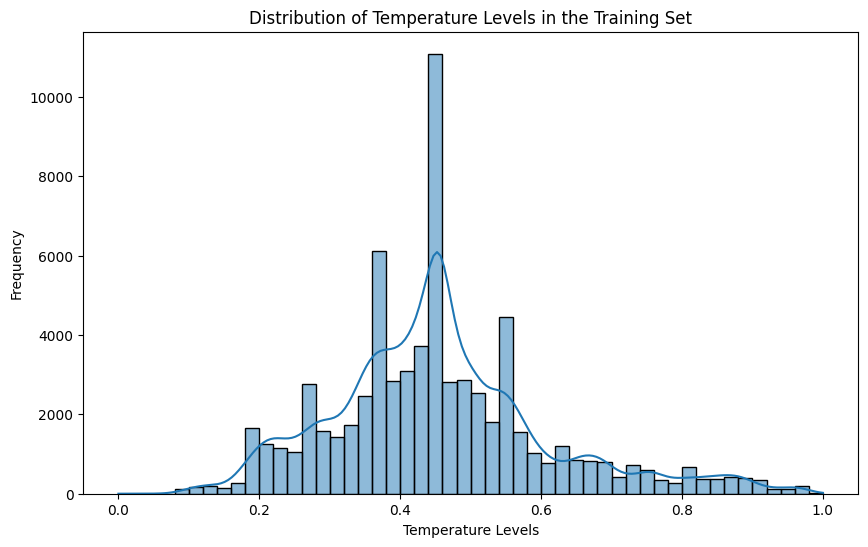

count    69801.000000
mean         0.455154
std          0.154922
min          0.000000
25%          0.360656
50%          0.442623
75%          0.524590
max          1.000000
Name: Temperature, dtype: float64


In [15]:
# Plot the distribution of the ammonia levels
plt.figure(figsize=(10, 6))
sns.histplot(y_train, bins=50, kde=True)
plt.xlabel('Temperature Levels')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Levels in the Training Set')
plt.show()

# Calculate descriptive statistics
print(y_train.describe())

## Window Generation for Time Series Data

In [16]:
class WindowGenerator:
    def __init__(self, input_width, label_width, shift,
                 train_data, val_data, test_data,
                 label_columns=None):
        # Store the raw data.
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

        # Store the column indices for the labels.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_data.columns)}

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Squeeze the features dimension if only one feature is used
        return inputs, labels

    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32)

        ds = ds.map(self.split_window)

        return ds

    def plot(self, model=None, plot_col=None, max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n + 1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)

            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, 0], edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)
            plt.scatter(self.label_indices, labels[n, :, 0], edgecolors='k', label='Labels', c='#2ca02c', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time')
        plt.show()

    @property
    def train(self):
        return self.make_dataset(self.train_data)

    @property
    def val(self):
        return self.make_dataset(self.val_data)

    @property
    def test(self):
        return self.make_dataset(self.test_data)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            result = next(iter(self.train))
            self._example = result
        return result

### Define the WindowGenerator Instance

In [17]:
input_width = 24  # Example: using 24 time steps as input
label_width = 1   # Example: predicting 1 time step ahead
shift = 24        # Example: shifting by 24 time steps

# Define the WindowGenerator instance
window = WindowGenerator(input_width=input_width,
                         label_width=label_width,
                         shift=shift,
                         train_data=df_train,
                         val_data=df_validation,
                         test_data=df_test,
                         label_columns=['Temperature']) 

## Create a Dynamic Conv1D Model

In [18]:
def build_conv1d_model(X_train, num_filters=64, kernel_size=1, dense_units=[50], dropout_rate=0.5):
    input_shape = X_train.shape[1:]  # Automatically extract the (timesteps, features) part of the shape

    model = Sequential()
    model.add(Input(shape=input_shape))

    # Add Conv1D layers
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))  # Pool size matches the number of timesteps (1)

    # Flatten the output to feed into Dense layers
    model.add(Flatten())

    # Add Dense layers
    for units in dense_units:
        model.add(Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))

    return model


### Compile, Train, and Evaluate the Conv1D Model

Now that the Conv1D model is defined, we can compile it, train it, and then evaluate its performance.

In [19]:
# Build the model
conv1d_model = build_conv1d_model(X_train, num_filters=256, kernel_size=1, dense_units=[100, 50], dropout_rate=0.001)

# Compile the model
conv1d_model.compile(optimizer='adam', loss='mse')

# Display the model architecture
conv1d_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1, 256)         │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,081 (125.32 KB)

 Trainable params: 32,081 (125.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 2s 593us/step - loss: 0.0201 - val_loss: 0.0371
Epoch 2/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 599us/step - loss: 0.0131 - val_loss: 0.0331
Epoch 3/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 0.0119 - val_loss: 0.0310
Epoch 4/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - loss: 0.0108 - val_loss: 0.0310
Epoch 5/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - loss: 0.0104 - val_loss: 0.0372
Epoch 6/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - loss: 0.0098 - val_loss: 0.0253
Epoch 7/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - loss: 0.0097 - val_loss: 0.0287
Epoch 8/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 0.0093 - val_loss: 0.0309
Epoch 9/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - loss: 0.0091 - val_loss: 0.0294
Epoch 10/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - loss: 0.0089 - val_loss: 0.0340
Epoch 11/20
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 584us/step - loss: 0.0086 - val_loss: 0.0389
Epoch 12

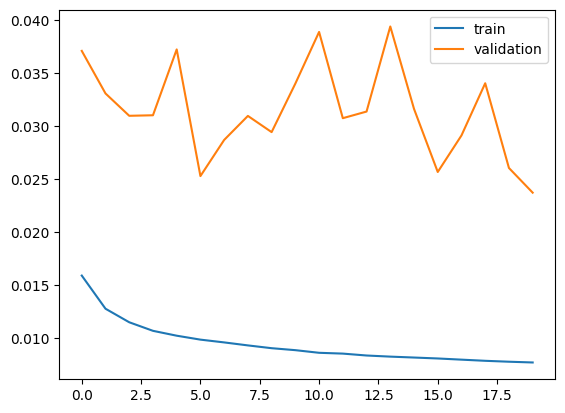

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.4540
Test Loss: 1.1439094543457031


In [20]:
# Train the model
history = conv1d_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_validation, y_validation)
)

# Plot the training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss = conv1d_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

### Model Evaluation

First, let’s evaluate the performance of current Conv1D model on the test set and visualize the predictions.

2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 260us/step
Training Set Mean Squared Error (MSE): 0.007240929885170771
Training Set Mean Absolute Error (MAE): 0.06010592531698778
Training Set R-squared (R²): 0.6983004149515817


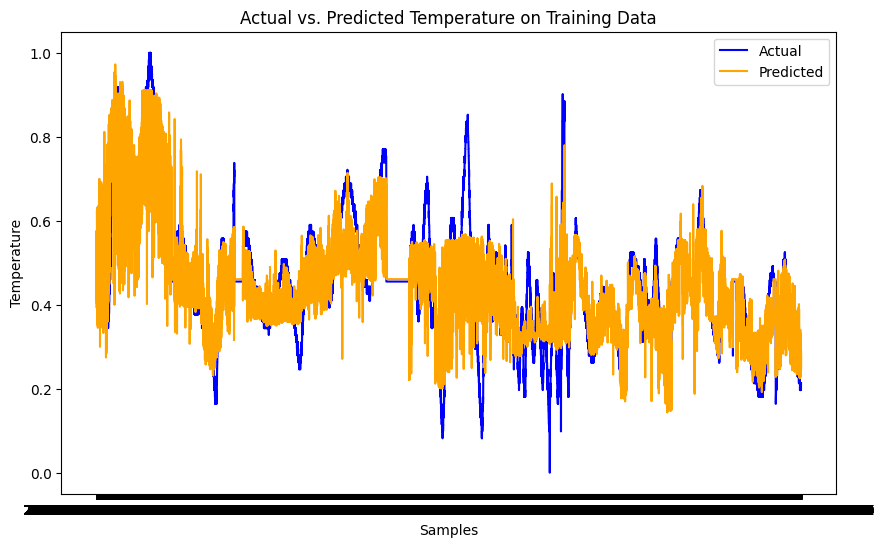

In [21]:
# Generate predictions on the training set
y_train_pred = conv1d_model.predict(X_train)

# Calculate MSE, MAE, and R² for the training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Training Set Mean Squared Error (MSE): {mse_train}')
print(f'Training Set Mean Absolute Error (MAE): {mae_train}')
print(f'Training Set R-squared (R²): {r2_train}')

# Plot the actual vs. predicted values on the training set
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual', color='blue')
plt.plot(y_train_pred, label='Predicted', color='orange')
plt.title('Actual vs. Predicted Temperature on Training Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

## Check on the test dataset 

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.4540
Test Loss: 1.1439094543457031


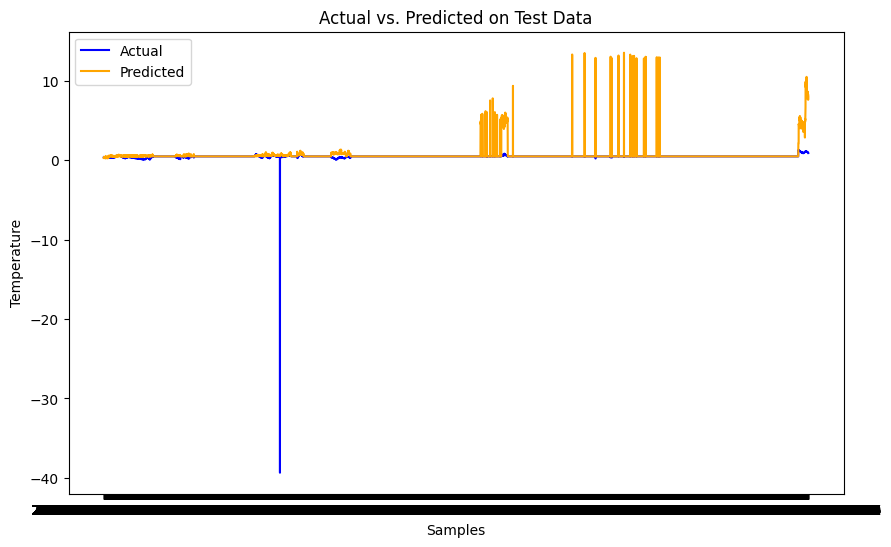

In [22]:
# Generate predictions on the test set
y_test_pred = conv1d_model.predict(X_test)

# Evaluate the test loss
test_loss = conv1d_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_test_pred, label='Predicted', color='orange')
plt.title('Actual vs. Predicted on Test Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [23]:
# Calculate other metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 0.20322105780762745
Root Mean Squared Error (RMSE): 1.0695373696789614
R-squared (R²): -8.864991940250924


## LSTM with Autoencoder

In [24]:
def build_lstm_autoencoder(X_train, lstm_units=128, dense_units=[50], dropout_rate=0.5):
    input_shape = X_train.shape[1:]

    model = Sequential()
    
    # Encoder
    model.add(LSTM(lstm_units, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(RepeatVector(input_shape[0]))  # Repeat the latent space for each timestep
    
    # Decoder
    model.add(LSTM(lstm_units, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(input_shape[1])))

    return model

# Build the LSTM autoencoder
lstm_autoencoder = build_lstm_autoencoder(X_train)

# Compile the LSTM autoencoder
lstm_autoencoder.compile(optimizer='adam', loss='mse')

# Train the LSTM autoencoder
history = lstm_autoencoder.fit(
    X_train, X_train,  # Using X_train as both input and target for autoencoder
    epochs=10,
    validation_data=(X_validation, X_validation)
)

# Evaluate the LSTM autoencoder on the test set
test_loss = lstm_autoencoder.evaluate(X_test, X_test)
print(f'LSTM Autoencoder Test Loss: {test_loss}')

Epoch 1/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0336 - val_loss: 1.2069e-04
Epoch 2/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.8878e-05 - val_loss: 6.2486e-05
Epoch 3/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.0246e-05 - val_loss: 2.0063e-05
Epoch 4/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.6185e-06 - val_loss: 1.3338e-05
Epoch 5/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.6725e-06 - val_loss: 7.0662e-06
Epoch 6/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.0079e-06 - val_loss: 8.3312e-06
Epoch 7/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.2838e-06 - val_loss: 1.2871e-05
Epoch 8/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1650e-06 - val_loss: 6.9929e-06
Epoch 9/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8220e-06 - val_loss: 6.1660e-06
Epoch 10/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7248e-06 - val_loss: 8.9864e-06
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step 

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
Test Set Mean Squared Error (MSE): 0.00911176297813654
Test Set Mean Absolute Error (MAE): 0.01483471691608429
Test Set R-squared (R²): 0.9404487199208613


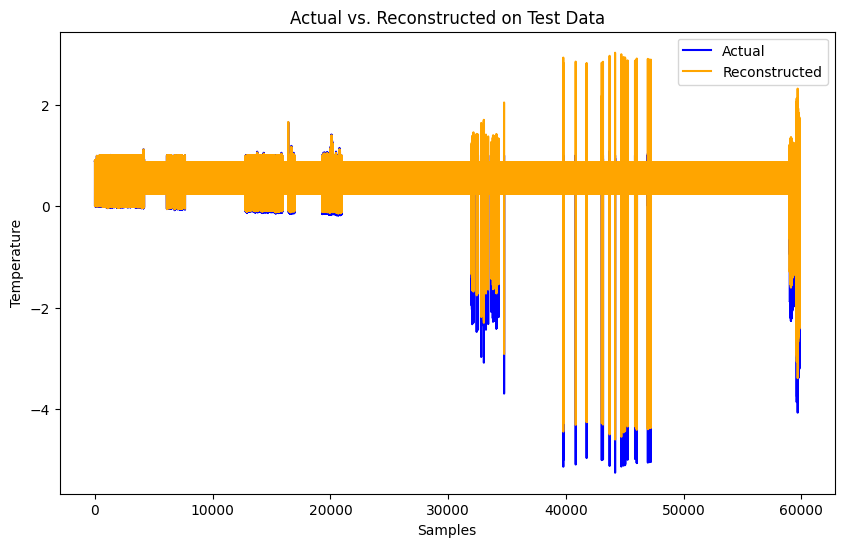

In [25]:
# Generate predictions (reconstructions) on the test set
y_test_pred = lstm_autoencoder.predict(X_test)

# Calculate MSE, MAE, and R² for the test set
mse_test = mean_squared_error(X_test.reshape(-1), y_test_pred.reshape(-1))
mae_test = mean_absolute_error(X_test.reshape(-1), y_test_pred.reshape(-1))
r2_test = r2_score(X_test.reshape(-1), y_test_pred.reshape(-1))

print(f'Test Set Mean Squared Error (MSE): {mse_test}')
print(f'Test Set Mean Absolute Error (MAE): {mae_test}')
print(f'Test Set R-squared (R²): {r2_test}')

# Plot the actual vs. reconstructed values on the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test.reshape(-1), label='Actual', color='blue')
plt.plot(y_test_pred.reshape(-1), label='Reconstructed', color='orange')
plt.title('Actual vs. Reconstructed on Test Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

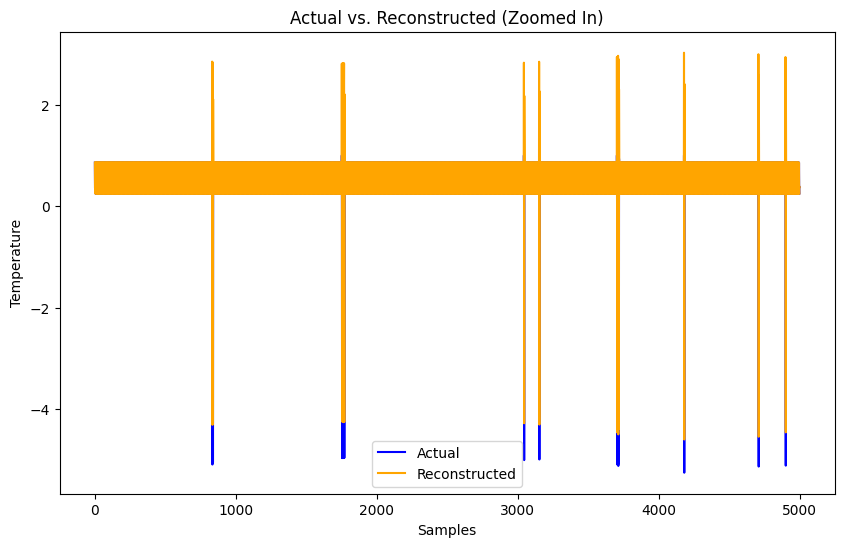

In [26]:
# Zoom in on a specific section of the test data
start_index = 40000
end_index = 45000

plt.figure(figsize=(10, 6))
plt.plot(X_test.reshape(-1)[start_index:end_index], label='Actual', color='blue')
plt.plot(y_test_pred.reshape(-1)[start_index:end_index], label='Reconstructed', color='orange')
plt.title('Actual vs. Reconstructed (Zoomed In)')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# GRU with Autoencoder

Epoch 1/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0188 - val_loss: 2.5135e-05
Epoch 2/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.6609e-06 - val_loss: 3.0714e-05
Epoch 3/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.7041e-06 - val_loss: 1.3584e-05
Epoch 4/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.3094e-06 - val_loss: 2.5825e-05
Epoch 5/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.5289e-06 - val_loss: 1.0467e-05
Epoch 6/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.1769e-06 - val_loss: 1.5134e-05
Epoch 7/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.6132e-06 - val_loss: 9.5485e-06
Epoch 8/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.9401e-06 - val_loss: 1.0682e-05
Epoch 9/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.1827e-06 - val_loss: 1.2126e-05
Epoch 10/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.5167e-06 - val_loss: 6.8066e-06
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step 

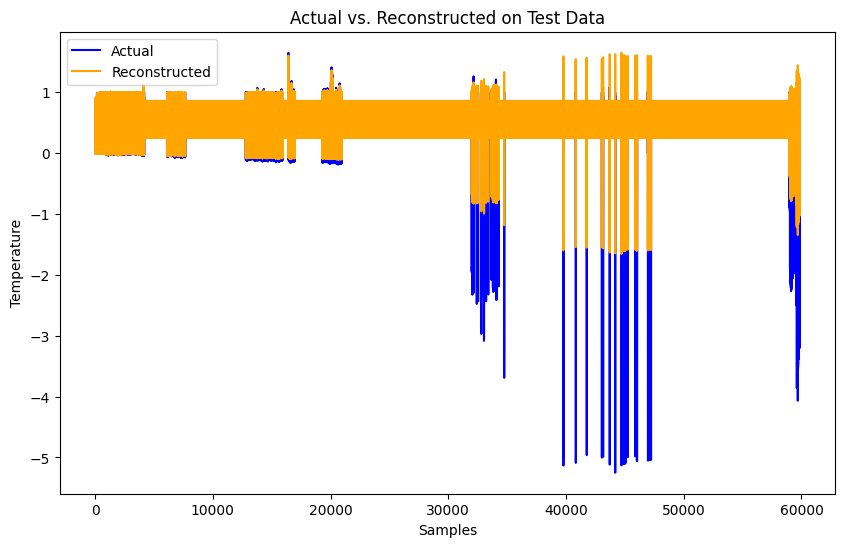

In [27]:
def build_gru_autoencoder(X_train, gru_units=128, dense_units=[50], dropout_rate=0.5):
    input_shape = X_train.shape[1:]

    model = Sequential()
    
    # Encoder
    model.add(GRU(gru_units, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(RepeatVector(input_shape[0]))  # Repeat the latent space for each timestep
    
    # Decoder
    model.add(GRU(gru_units, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(input_shape[1])))

    return model

# Build the GRU autoencoder
gru_autoencoder = build_gru_autoencoder(X_train)

# Compile the GRU autoencoder
gru_autoencoder.compile(optimizer='adam', loss='mse')

# Train the GRU autoencoder
history = gru_autoencoder.fit(
    X_train, X_train,  # Using X_train as both input and target for autoencoder
    epochs=10,
    validation_data=(X_validation, X_validation)
)

# Evaluate the GRU autoencoder on the test set
test_loss = gru_autoencoder.evaluate(X_test, X_test)
print(f'GRU Autoencoder Test Loss: {test_loss}')


# Generate predictions (reconstructions) on the test set
y_test_pred = gru_autoencoder.predict(X_test)

# Calculate MSE, MAE, and R² for the test set
mse_test = mean_squared_error(X_test.reshape(-1), y_test_pred.reshape(-1))
mae_test = mean_absolute_error(X_test.reshape(-1), y_test_pred.reshape(-1))
r2_test = r2_score(X_test.reshape(-1), y_test_pred.reshape(-1))

print(f'Test Set Mean Squared Error (MSE): {mse_test}')
print(f'Test Set Mean Absolute Error (MAE): {mae_test}')
print(f'Test Set R-squared (R²): {r2_test}')

# Plot the actual vs. reconstructed values on the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test.reshape(-1), label='Actual', color='blue')
plt.plot(y_test_pred.reshape(-1), label='Reconstructed', color='orange')
plt.title('Actual vs. Reconstructed on Test Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# CNN with Autoencoder

Epoch 1/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - loss: 0.0134 - val_loss: 7.8535e-04
Epoch 2/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: 1.5505e-04 - val_loss: 6.3562e-04
Epoch 3/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - loss: 5.8417e-05 - val_loss: 5.0563e-04
Epoch 4/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 3.0805e-05 - val_loss: 4.3298e-04
Epoch 5/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 2.2899e-05 - val_loss: 4.5951e-04
Epoch 6/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step - loss: 2.0512e-05 - val_loss: 4.4949e-04
Epoch 7/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 1.8193e-05 - val_loss: 4.1486e-04
Epoch 8/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - loss: 1.7208e-05 - val_loss: 4.4439e-04
Epoch 9/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - loss: 1.5430e-05 - val_loss: 4.3853e-04
Epoch 10/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - loss: 1.5498e-05 - val_loss: 4.1433e-04
468/468 ━━━━━━━━━━━━━━━

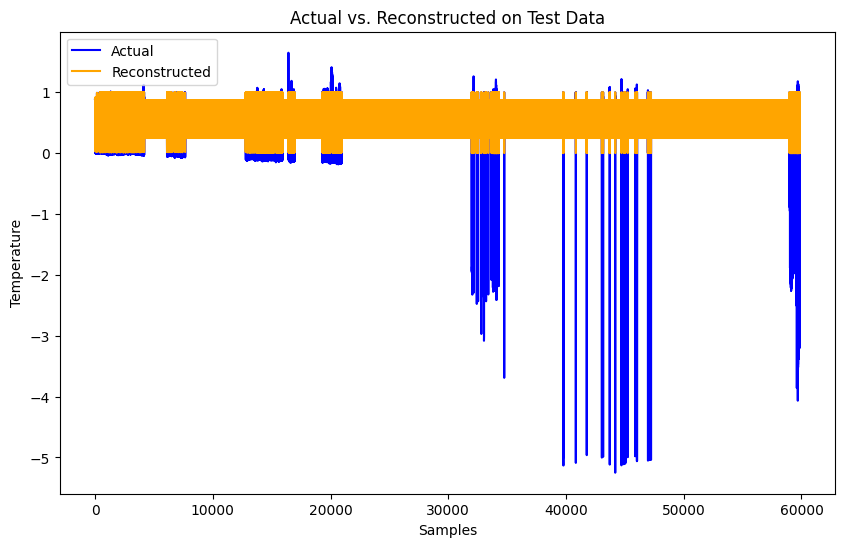

In [34]:
def build_cnn_autoencoder(X_train, num_filters=128, kernel_size=3, dense_units=[50], dropout_rate=0.5):
    input_shape = X_train.shape[1:]

    model = Sequential()

    # Encoder
    model.add(Input(shape=input_shape))
    model.add(Conv1D(filters=num_filters, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(MaxPooling1D(pool_size=2, padding='same'))
    model.add(Flatten())
    model.add(Dense(dense_units[0], activation='relu'))

    # Decoder
    model.add(Dense(input_shape[0] * num_filters, activation='relu'))
    model.add(Reshape((input_shape[0], num_filters)))  # Ensure the time step is 1
    model.add(Conv1D(filters=input_shape[1], kernel_size=kernel_size, activation='sigmoid', padding='same'))

    return model


# Build the CNN autoencoder
cnn_autoencoder = build_cnn_autoencoder(X_train)

# Compile the CNN autoencoder
cnn_autoencoder.compile(optimizer='adam', loss='mse')

# Train the CNN autoencoder
history = cnn_autoencoder.fit(
    X_train, X_train,  # Using X_train as both input and target for autoencoder
    epochs=10,
    validation_data=(X_validation, X_validation)
)

# Evaluate the CNN autoencoder on the test set
test_loss = cnn_autoencoder.evaluate(X_test, X_test)
print(f'CNN Autoencoder Test Loss: {test_loss}')

# Generate predictions (reconstructions) on the test set
y_test_pred = cnn_autoencoder.predict(X_test)

# Calculate MSE, MAE, and R² for the test set
mse_test = mean_squared_error(X_test.reshape(-1), y_test_pred.reshape(-1))
mae_test = mean_absolute_error(X_test.reshape(-1), y_test_pred.reshape(-1))
r2_test = r2_score(X_test.reshape(-1), y_test_pred.reshape(-1))

print(f'Test Set Mean Squared Error (MSE): {mse_test}')
print(f'Test Set Mean Absolute Error (MAE): {mae_test}')
print(f'Test Set R-squared (R²): {r2_test}')

# Plot the actual vs. reconstructed values on the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test.reshape(-1), label='Actual', color='blue')
plt.plot(y_test_pred.reshape(-1), label='Reconstructed', color='orange')
plt.title('Actual vs. Reconstructed on Test Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Neural Network with Autoencoder

Epoch 1/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 2s 603us/step - loss: 0.0090 - val_loss: 8.0159e-04
Epoch 2/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - loss: 7.6015e-05 - val_loss: 5.8360e-04
Epoch 3/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - loss: 5.2370e-05 - val_loss: 5.1672e-04
Epoch 4/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - loss: 4.1622e-05 - val_loss: 4.8709e-04
Epoch 5/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 3.5621e-05 - val_loss: 4.0268e-04
Epoch 6/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 2.8688e-05 - val_loss: 3.2087e-04
Epoch 7/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: 2.3086e-05 - val_loss: 2.9647e-04
Epoch 8/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 1.8476e-05 - val_loss: 3.2553e-04
Epoch 9/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - loss: 1.7453e-05 - val_loss: 2.8238e-04
Epoch 10/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step - loss: 2.1426e-05 - val_loss: 2.7201e-04
468/468 ━━━━━━━━━━━━━━━

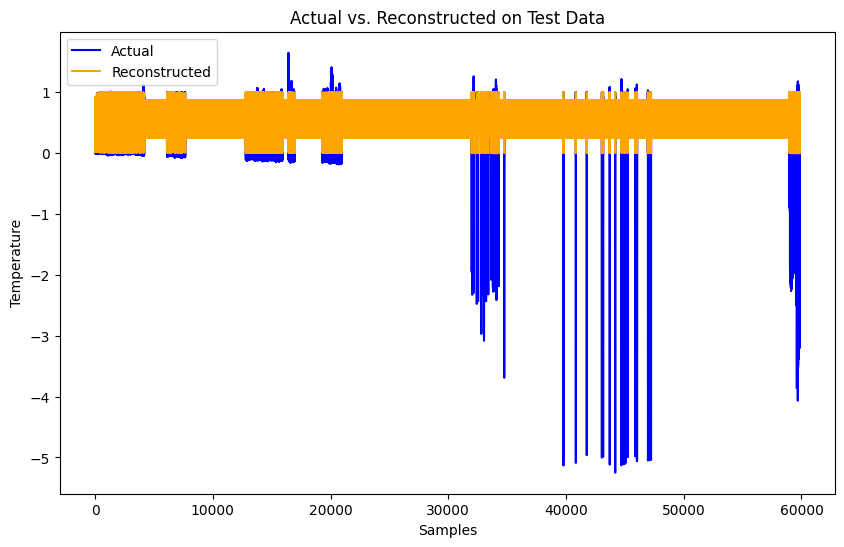

In [35]:
def build_nn_autoencoder(X_train, dense_units=[128, 64, 32], dropout_rate=0.5):
    input_shape = X_train.shape[1:]

    model = Sequential()
    
    # Encoder
    model.add(Input(shape=input_shape))
    model.add(Flatten())  # Flatten the input to feed into Dense layers
    
    # Dense layers for encoding
    for units in dense_units:
        model.add(Dense(units, activation='relu'))
    
    # Latent space
    model.add(Dense(dense_units[-1], activation='relu'))

    # Dense layers for decoding
    for units in reversed(dense_units[:-1]):
        model.add(Dense(units, activation='relu'))
    
    # Decoder
    model.add(Dense(input_shape[0] * input_shape[1], activation='sigmoid'))  # Output should match the flattened input shape
    model.add(Reshape(input_shape))  # Reshape the output back to the original input shape

    return model

# Build the neural network autoencoder
nn_autoencoder = build_nn_autoencoder(X_train)

# Compile the neural network autoencoder
nn_autoencoder.compile(optimizer='adam', loss='mse')

# Train the neural network autoencoder
history = nn_autoencoder.fit(
    X_train, X_train,  # Using X_train as both input and target for autoencoder
    epochs=10,
    validation_data=(X_validation, X_validation)
)

# Evaluate the neural network autoencoder on the test set
test_loss = nn_autoencoder.evaluate(X_test, X_test)
print(f'Neural Network Autoencoder Test Loss: {test_loss}')

# Generate predictions (reconstructions) on the test set
y_test_pred = nn_autoencoder.predict(X_test)

# Calculate MSE, MAE, and R² for the test set
mse_test = mean_squared_error(X_test.reshape(-1), y_test_pred.reshape(-1))
mae_test = mean_absolute_error(X_test.reshape(-1), y_test_pred.reshape(-1))
r2_test = r2_score(X_test.reshape(-1), y_test_pred.reshape(-1))

print(f'Test Set Mean Squared Error (MSE): {mse_test}')
print(f'Test Set Mean Absolute Error (MAE): {mae_test}')
print(f'Test Set R-squared (R²): {r2_test}')

# Plot the actual vs. reconstructed values on the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test.reshape(-1), label='Actual', color='blue')
plt.plot(y_test_pred.reshape(-1), label='Reconstructed', color='orange')
plt.title('Actual vs. Reconstructed on Test Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Hybrid Model (LSTM with Autoencoder + GRU with autoencoder)

Epoch 1/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0253 - val_loss: 3.7908e-05
Epoch 2/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.8620e-06 - val_loss: 2.6278e-05
Epoch 3/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4.3202e-06 - val_loss: 1.2308e-05
Epoch 4/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.6414e-06 - val_loss: 1.8274e-05
Epoch 5/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3.2699e-06 - val_loss: 1.0140e-05
Epoch 6/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.7406e-06 - val_loss: 1.0389e-05
Epoch 7/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.7213e-06 - val_loss: 1.0448e-05
Epoch 8/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3000e-06 - val_loss: 6.0456e-06
Epoch 9/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1348e-06 - val_loss: 8.6128e-06
Epoch 10/10
2182/2182 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9223e-06 - val_loss: 9.4498e-06
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step 

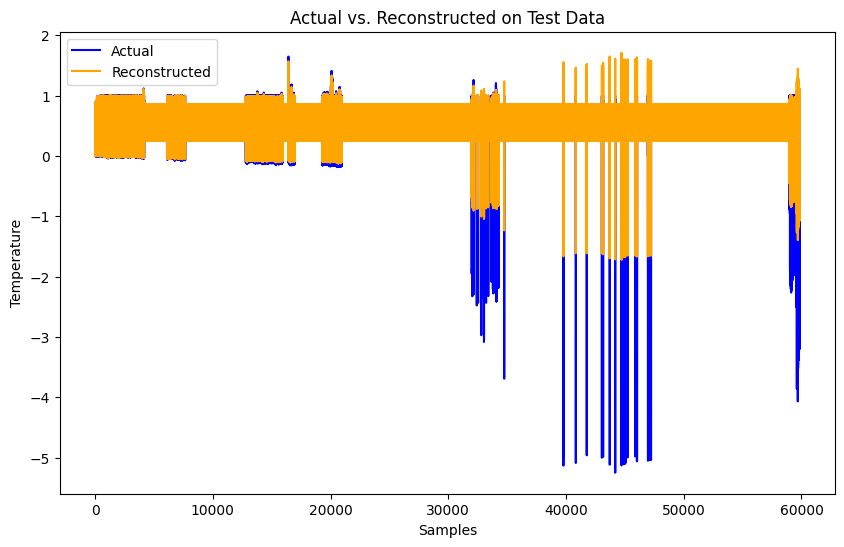

In [38]:
def build_hybrid_autoencoder(X_train, lstm_units=128, gru_units=128, dense_units=[50], dropout_rate=0.5):
    input_shape = X_train.shape[1:]

    model = Sequential()
    
    # Encoder
    model.add(Input(shape=input_shape))
    model.add(LSTM(lstm_units, activation='relu', return_sequences=False))
    model.add(RepeatVector(input_shape[0]))  # Repeat the latent space for each timestep
    
    # Decoder using GRU
    model.add(GRU(gru_units, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(input_shape[1])))

    return model

# Build the hybrid autoencoder model
hybrid_autoencoder = build_hybrid_autoencoder(X_train)

# Compile the hybrid autoencoder model
hybrid_autoencoder.compile(optimizer='adam', loss='mse')

# Train the hybrid autoencoder model
history = hybrid_autoencoder.fit(
    X_train, X_train,  # Using X_train as both input and target for autoencoder
    epochs=10,
    validation_data=(X_validation, X_validation)
)

# Evaluate the hybrid autoencoder on the test set
test_loss = hybrid_autoencoder.evaluate(X_test, X_test)
print(f'Hybrid Autoencoder Test Loss: {test_loss}')

# Generate predictions (reconstructions) on the test set
y_test_pred = hybrid_autoencoder.predict(X_test)

# Extract the feature of interest from both actual and predicted data
X_test_temp = X_test[:, 0, feature_index]
y_test_pred_temp = y_test_pred[:, 0, feature_index]

# Calculate MSE, MAE, and R² for the test set
mse_test = mean_squared_error(X_test.reshape(-1), y_test_pred.reshape(-1))
mae_test = mean_absolute_error(X_test.reshape(-1), y_test_pred.reshape(-1))
r2_test = r2_score(X_test.reshape(-1), y_test_pred.reshape(-1))

print(f'Test Set Mean Squared Error (MSE): {mse_test}')
print(f'Test Set Mean Absolute Error (MAE): {mae_test}')
print(f'Test Set R-squared (R²): {r2_test}')

# Plot the actual vs. reconstructed values on the test set
plt.figure(figsize=(10, 6))
plt.plot(X_test.reshape(-1), label='Actual', color='blue')
plt.plot(y_test_pred.reshape(-1), label='Reconstructed', color='orange')
plt.title('Actual vs. Reconstructed on Test Data')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Comparison

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step
Hybrid LSTM-GRU Autoencoder:
  MSE: 0.02235587313771248
  MAE: 0.018421029672026634
  R²: 0.8538898628708014


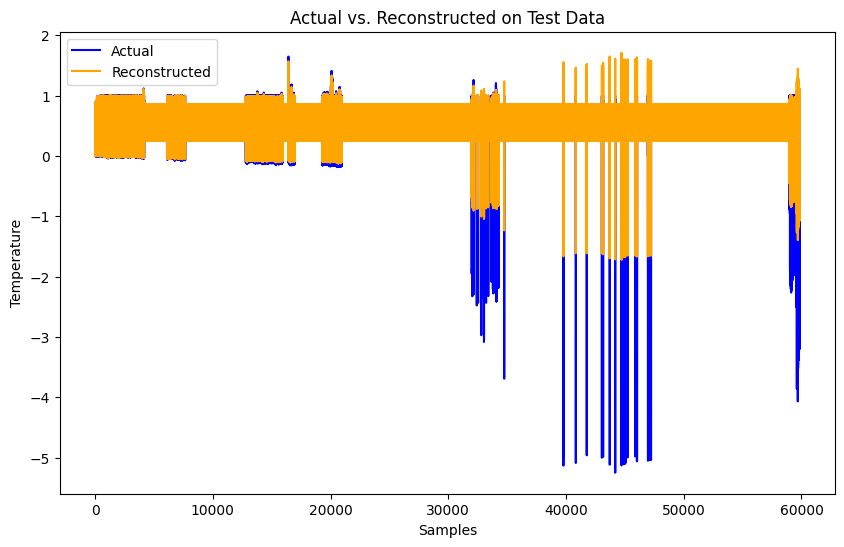

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step
Neural Network Autoencoder:
  MSE: 0.054031483829021454
  MAE: 0.03299516811966896
  R²: 0.646869188556495


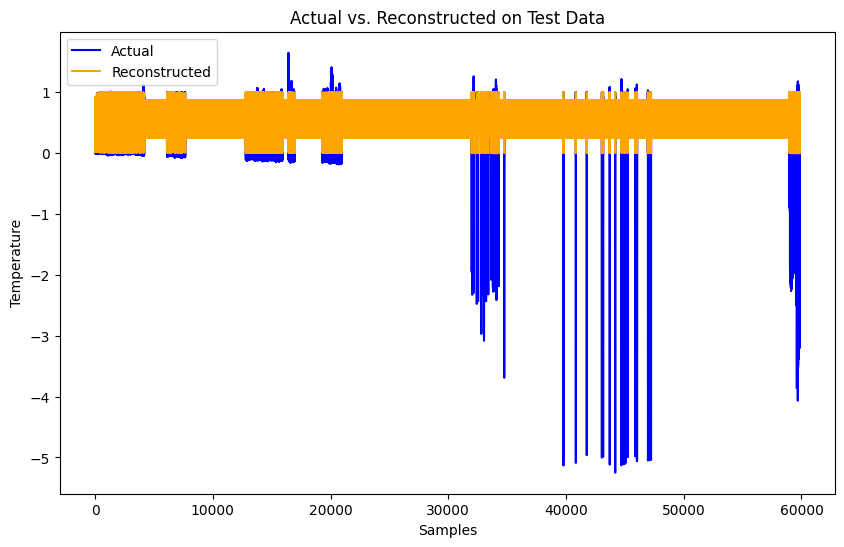

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
CNN Autoencoder:
  MSE: 0.05154403671622276
  MAE: 0.028244581073522568
  R²: 0.6631262954122523


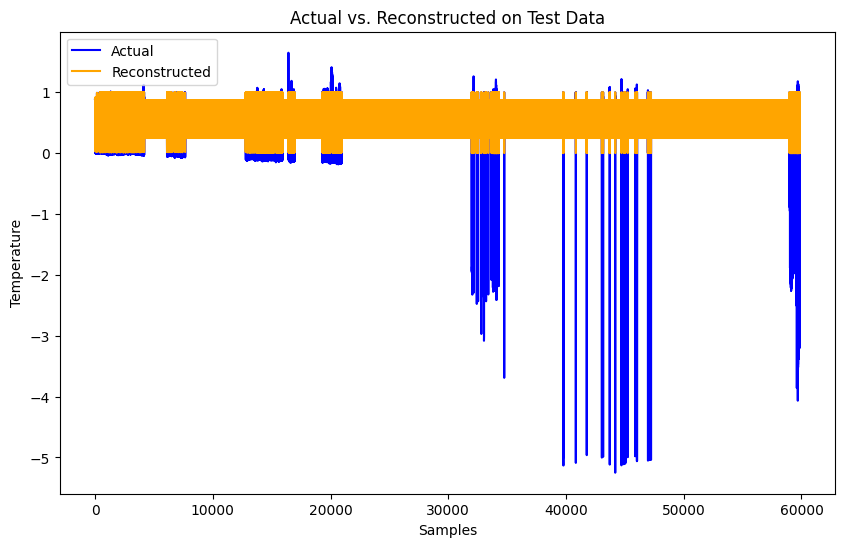

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
GRU Autoencoder:
  MSE: 0.0236581452190876
  MAE: 0.01827831193804741
  R²: 0.8453786642143573


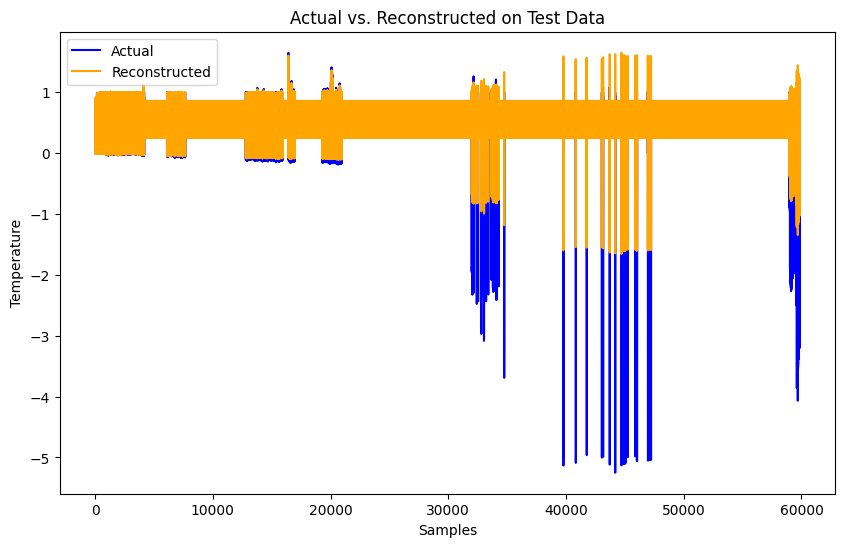

468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step
LSTM Autoencoder:
  MSE: 0.00911176297813654
  MAE: 0.01483471691608429
  R²: 0.9404487199208613


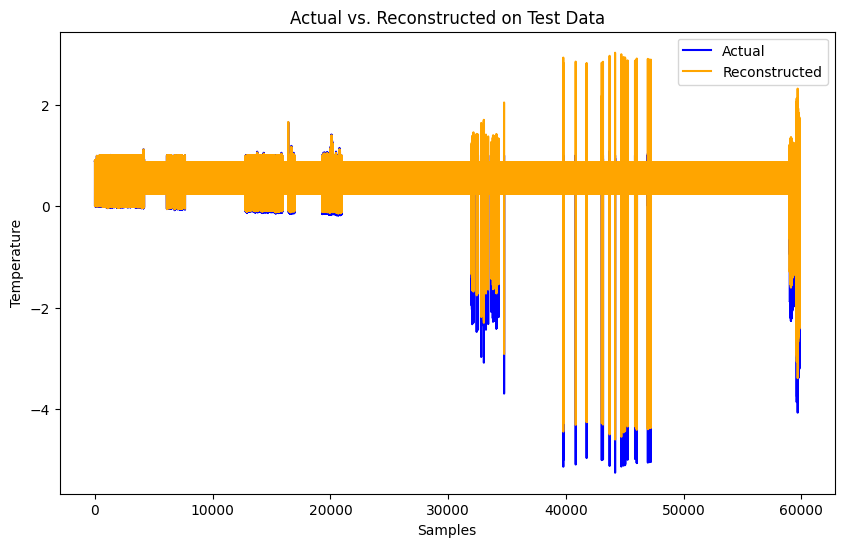


Model Performance Comparison:

Hybrid LSTM-GRU Autoencoder:
  MSE: 0.02235587313771248
  MAE: 0.018421029672026634
  R²: 0.8538898628708014

Neural Network Autoencoder:
  MSE: 0.054031483829021454
  MAE: 0.03299516811966896
  R²: 0.646869188556495

CNN Autoencoder:
  MSE: 0.05154403671622276
  MAE: 0.028244581073522568
  R²: 0.6631262954122523

GRU Autoencoder:
  MSE: 0.0236581452190876
  MAE: 0.01827831193804741
  R²: 0.8453786642143573

LSTM Autoencoder:
  MSE: 0.00911176297813654
  MAE: 0.01483471691608429
  R²: 0.9404487199208613


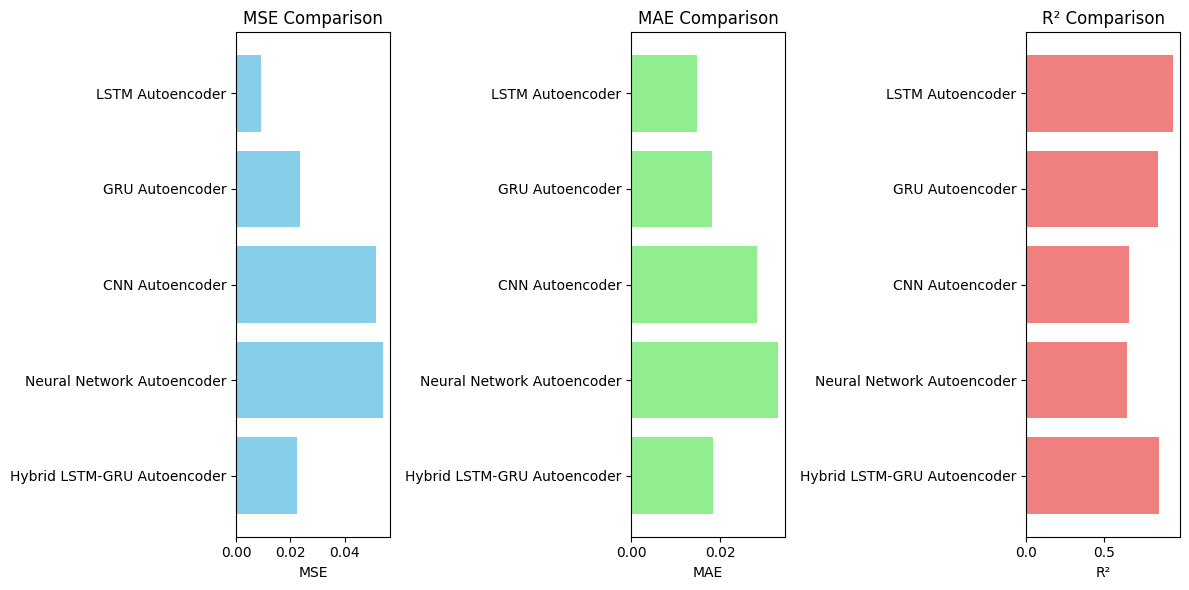

In [44]:
# Dictionary to store results
results = {}

# Models to evaluate
models = {
    "Hybrid LSTM-GRU Autoencoder": hybrid_autoencoder,
    "Neural Network Autoencoder": nn_autoencoder,
    "CNN Autoencoder": cnn_autoencoder,
    "GRU Autoencoder": gru_autoencoder,
    "LSTM Autoencoder": lstm_autoencoder
}

# Loop over each model, generate predictions, and calculate metrics
for name, model in models.items():
    # Generate predictions (reconstructions) on the test set
    y_test_pred = model.predict(X_test)

    # Extract the feature of interest from both actual and predicted data
    X_test_temp = X_test[:, 0, feature_index]
    y_test_pred_temp = y_test_pred[:, 0, feature_index]

    # Calculate MSE, MAE, and R² for the test set
    mse_test = mean_squared_error(X_test.reshape(-1), y_test_pred.reshape(-1))
    mae_test = mean_absolute_error(X_test.reshape(-1), y_test_pred.reshape(-1))
    r2_test = r2_score(X_test.reshape(-1), y_test_pred.reshape(-1))

        # Store the results
    results[name] = {
        "MSE": mse_test,
        "MAE": mae_test,
        "R²": r2_test
    }

    # Print the metrics
    print(f'{name}:')
    print(f'  MSE: {mse_test}')
    print(f'  MAE: {mae_test}')
    print(f'  R²: {r2_test}')

    # Plot the actual vs. reconstructed values on the test set
    plt.figure(figsize=(10, 6))
    plt.plot(X_test.reshape(-1), label='Actual', color='blue')
    plt.plot(y_test_pred.reshape(-1), label='Reconstructed', color='orange')
    plt.title('Actual vs. Reconstructed on Test Data')
    plt.xlabel('Samples')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()

# Summary of results
print("\nModel Performance Comparison:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  R²: {metrics['R²']}")

plt.figure(figsize=(12, 6))

# Extracting the names of the models and their respective metrics
model_names = list(results.keys())
mse_values = [results[name]['MSE'] for name in model_names]
mae_values = [results[name]['MAE'] for name in model_names]
r2_values = [results[name]['R²'] for name in model_names]

# Plotting MSE, MAE, and R²
plt.subplot(1, 3, 1)
plt.barh(model_names, mse_values, color='skyblue')
plt.xlabel('MSE')
plt.title('MSE Comparison')

plt.subplot(1, 3, 2)
plt.barh(model_names, mae_values, color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE Comparison')

plt.subplot(1, 3, 3)
plt.barh(model_names, r2_values, color='lightcoral')
plt.xlabel('R²')
plt.title('R² Comparison')

plt.tight_layout()
plt.show()

# Correlation 

In [53]:
df=pd.read_csv("/Users/jabedhossain/Desktop/Python/Fish Farm Project/data/X_train_imputed_df1.csv")
df

,Date,Entry_id,Temperature,Turbidity,Dissolved_Oxygen,pH,Ammonia,Nitrate,Fish_Length,Fish_Weight,Month,Quarter,Season,Large_Gap,general_missing
0,2021-06-19 00:01:02,1,24.9375,100.0,6.601,8.43818,0.45842,194.0,7.11,2.91,6.0,2.0,Summer,0.0,0
1,2021-06-19 00:01:22,2,24.8750,100.0,15.797,8.42457,0.45842,192.0,7.11,2.91,6.0,2.0,Summer,0.0,0
2,2021-06-19 00:01:44,3,24.9375,100.0,5.046,8.43365,0.45842,193.0,7.11,2.91,6.0,2.0,Summer,0.0,0
3,2021-06-19 00:02:07,4,24.9375,100.0,38.407,8.40641,0.45842,192.0,7.11,2.91,6.0,2.0,Summer,0.0,0
4,2021-06-19 00:02:27,5,24.9375,100.0,3.862,8.42003,0.45842,193.0,7.11,2.91,6.0,2.0,Summer,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99712,2021-10-13 02:48:31,99713,26.5625,100.0,0.441,2.56412,5.91282,946.0,33.45,318.64,10.0,4.0,Fall,0.0,0
99713,2021-10-13 03:17:36,99714,26.5625,100.0,1.020,2.67760,4.21414,985.0,33.45,318.64,10.0,4.0,Fall,0.0,0
99714,2021-10-13 03:46:49,99715,26.5000,100.0,0.852,2.45063,8.18873,963.0,33.45,318.64,10.0,4.0,Fall,0.0,0
99715,2021-10-13 04:13:23,99716,26.3750,100.0,4.850,2.41885,10.62411,944.0,33.45,318.64,10.0,4.0,Fall,0.0,0


In [56]:
df.columns

Index(['Date', 'Entry_id', 'Temperature', 'Turbidity', 'Dissolved_Oxygen',
       'pH', 'Ammonia', 'Nitrate', 'Fish_Length', 'Fish_Weight', 'Month',
       'Quarter', 'Season', 'Large_Gap', 'general_missing'],
      dtype='object')

In [61]:
def count_nulls(df):
    # count number of null values for each column in a given dataframe
    count = df.isnull().sum()
    pct = round(df.isnull().mean() * 100, 1)
    null_values = pd.concat([count, pct], axis=1, keys=["count", "%"])
    print('Null values in the dataset:')
    print(null_values)

count_nulls(df)

Null values in the dataset:
                  count     %
Date                  0   0.0
Entry_id              0   0.0
Temperature       16646  16.7
Turbidity         16646  16.7
Dissolved_Oxygen  16646  16.7
pH                16646  16.7
Ammonia           16646  16.7
Nitrate           16646  16.7
Fish_Length       16646  16.7
Fish_Weight       16646  16.7
Month             16646  16.7
Quarter           16646  16.7
Season            16646  16.7
Large_Gap         16646  16.7
general_missing       0   0.0


In [62]:
# Drop rows with null values in all columns 
columns_to_check = [col for col in df.columns ]
df.dropna(subset=columns_to_check, inplace=True)

In [63]:
count_nulls(df)

Null values in the dataset:
                  count    %
Date                  0  0.0
Entry_id              0  0.0
Temperature           0  0.0
Turbidity             0  0.0
Dissolved_Oxygen      0  0.0
pH                    0  0.0
Ammonia               0  0.0
Nitrate               0  0.0
Fish_Length           0  0.0
Fish_Weight           0  0.0
Month                 0  0.0
Quarter               0  0.0
Season                0  0.0
Large_Gap             0  0.0
general_missing       0  0.0


In [64]:
columns_to_select=['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Nitrate',
       'Ammonia','Fish_Length','Fish_Weight']

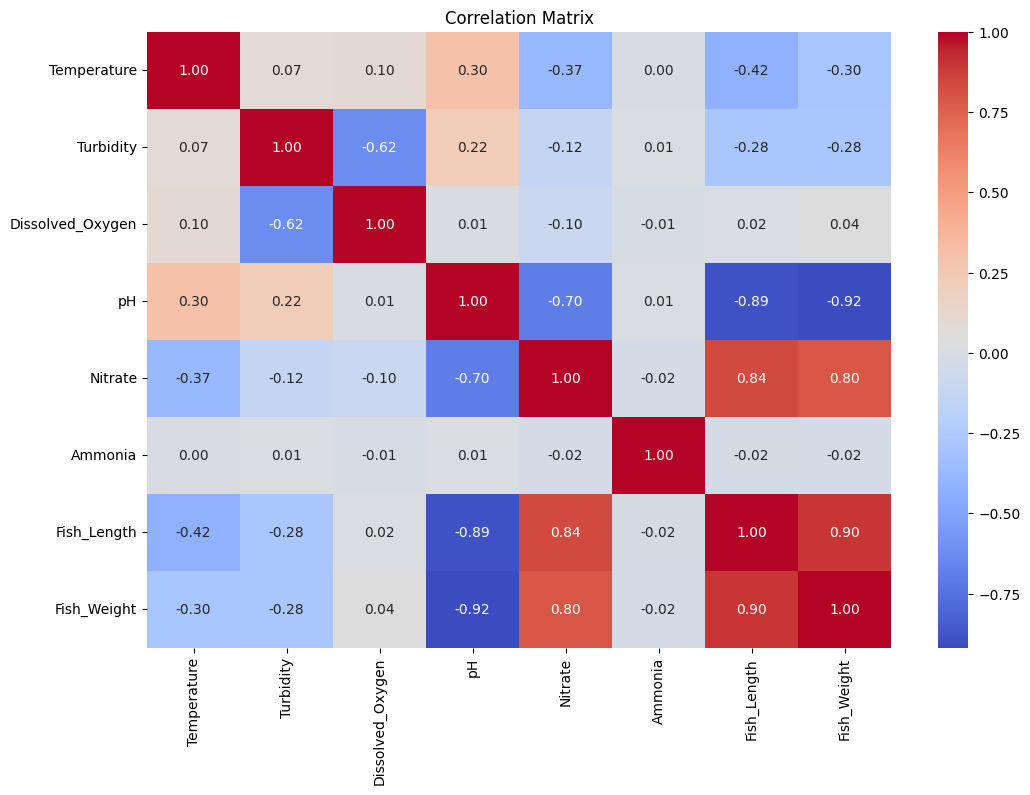

                  Fish_Length  Fish_Weight
Temperature         -0.420238    -0.296262
Turbidity           -0.280233    -0.284126
Dissolved_Oxygen     0.017399     0.042057
pH                  -0.894833    -0.919020
Nitrate              0.839398     0.795956
Ammonia             -0.018230    -0.020204
Fish_Length          1.000000     0.899393
Fish_Weight          0.899393     1.000000


In [65]:
# Calculate the correlation matrix
corr_matrix = df[columns_to_select].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Focus on correlations with Fish_Length and Fish_Weight
fish_corr = corr_matrix[['Fish_Length', 'Fish_Weight']]
print(fish_corr)

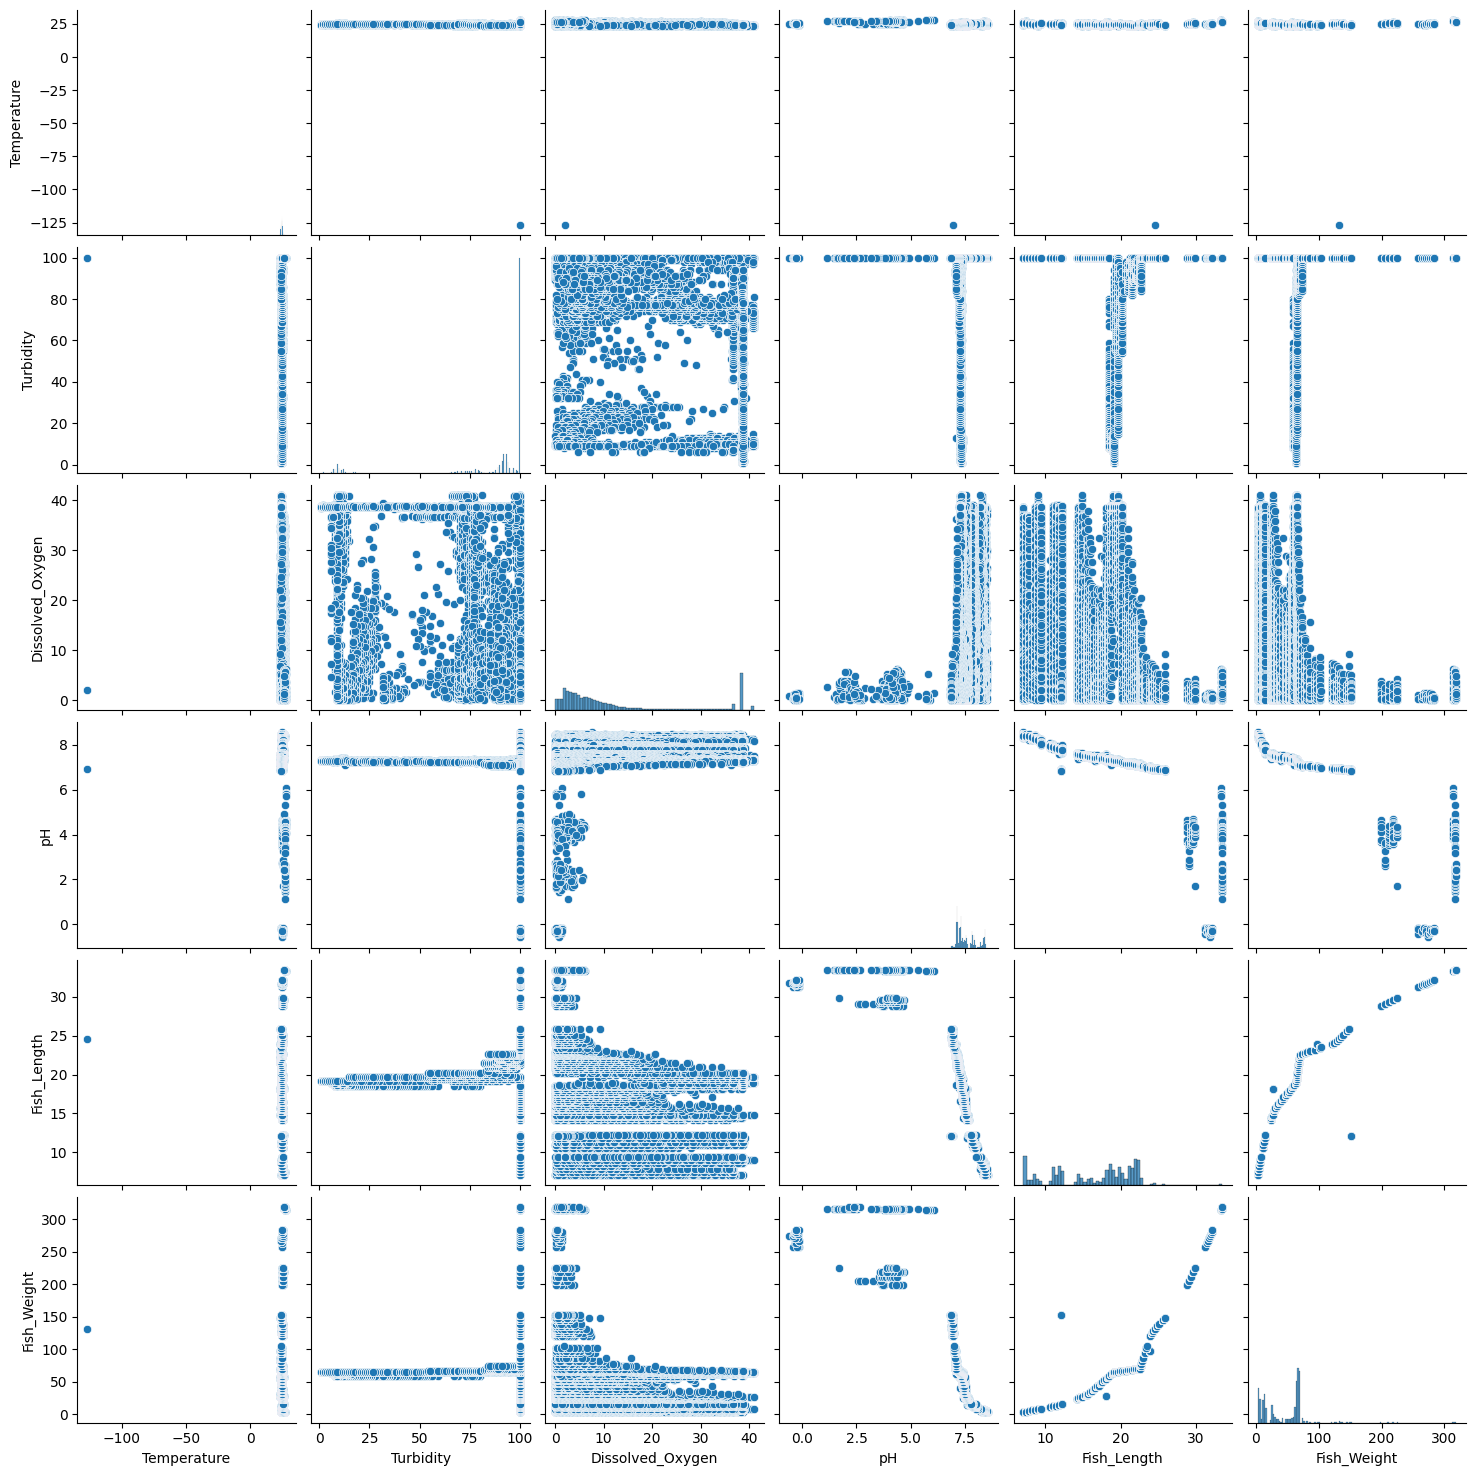

In [66]:
sns.pairplot(df, vars=['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH', 'Fish_Length', 'Fish_Weight'])
plt.show()

In [67]:
# Define the features and target for regression
X = df[['Temperature', 'Turbidity', 'Dissolved_Oxygen', 'pH']]
y_length = df['Fish_Length']
y_weight = df['Fish_Weight']

# Split the data
X_train, X_test, y_length_train, y_length_test = train_test_split(X, y_length, test_size=0.3, random_state=42)
X_train, X_test, y_weight_train, y_weight_test = train_test_split(X, y_weight, test_size=0.3, random_state=42)

# Train the model for Fish Length
model_length = LinearRegression()
model_length.fit(X_train, y_length_train)
y_length_pred = model_length.predict(X_test)

# Train the model for Fish Weight
model_weight = LinearRegression()
model_weight.fit(X_train, y_weight_train)
y_weight_pred = model_weight.predict(X_test)

# Evaluate the model
mse_length = mean_squared_error(y_length_test, y_length_pred)
r2_length = r2_score(y_length_test, y_length_pred)
mse_weight = mean_squared_error(y_weight_test, y_weight_pred)
r2_weight = r2_score(y_weight_test, y_weight_pred)

print(f'Fish Length Model: MSE={mse_length}, R²={r2_length}')
print(f'Fish Weight Model: MSE={mse_weight}, R²={r2_weight}')

Fish Length Model: MSE=6.932100239232309, R²=0.7480981116767785
Fish Weight Model: MSE=166.37106736972186, R²=0.84556545667504


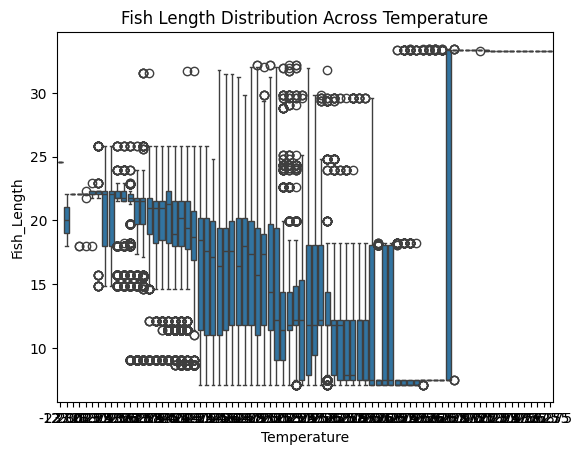

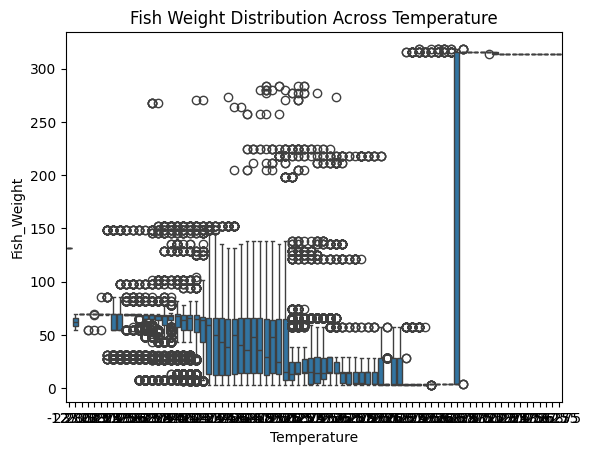

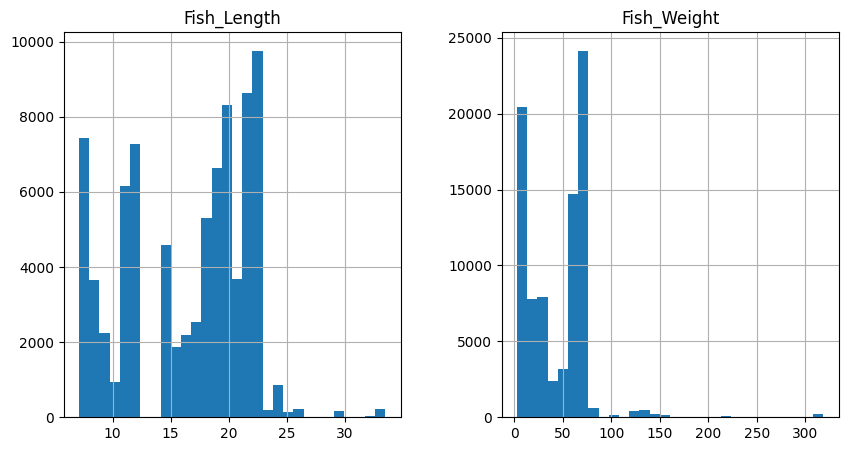

In [68]:
# Boxplot to see the distribution of Fish Length and Weight across Temperature ranges
sns.boxplot(x='Temperature', y='Fish_Length', data=df)
plt.title('Fish Length Distribution Across Temperature')
plt.show()

sns.boxplot(x='Temperature', y='Fish_Weight', data=df)
plt.title('Fish Weight Distribution Across Temperature')
plt.show()

# Histograms
df[['Fish_Length', 'Fish_Weight']].hist(bins=30, figsize=(10, 5))
plt.show()

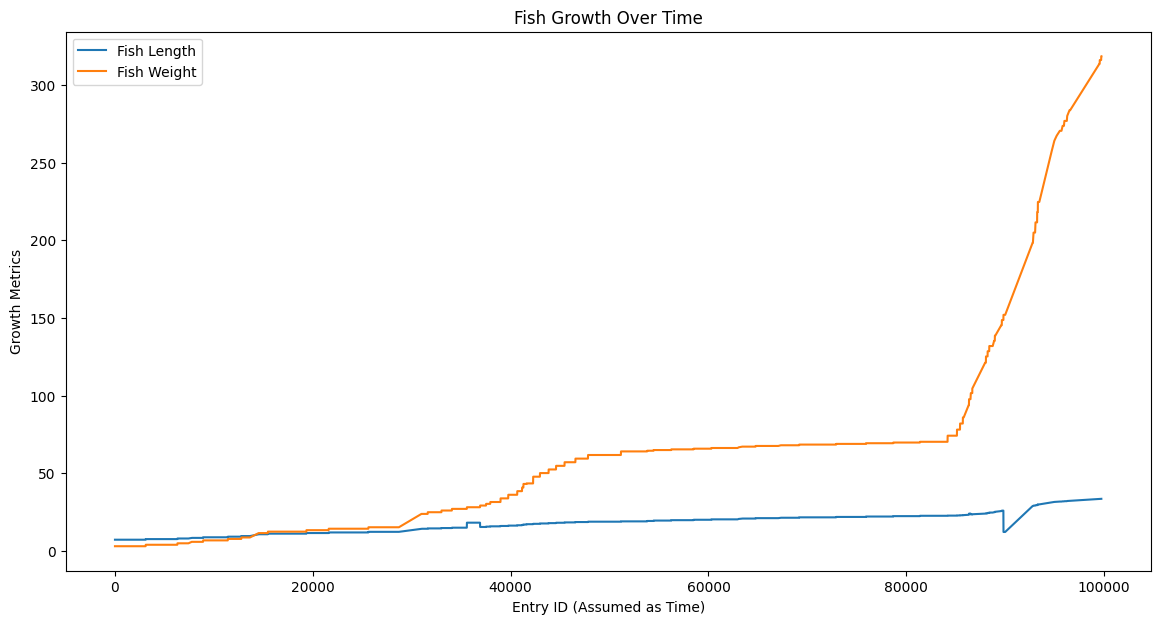

In [69]:
df.sort_values('Entry_id', inplace=True)
plt.figure(figsize=(14, 7))
plt.plot(df['Entry_id'], df['Fish_Length'], label='Fish Length')
plt.plot(df['Entry_id'], df['Fish_Weight'], label='Fish Weight')
plt.title('Fish Growth Over Time')
plt.xlabel('Entry ID (Assumed as Time)')
plt.ylabel('Growth Metrics')
plt.legend()
plt.show()